**Name: David Bjorelind

**EID:** dbjrelind2

# CS4487 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data)) # newsgroups_train.target blir testX
print("testing set size: ",  len(newsgroups_test.data)) # newsgroups_test.target blir testY
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### 1. Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [18]:
### INSERT YOUR CODE HERE
 #Creating vocablulary
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=100)

trainX = cntvect.fit_transform(newsgroups_train.data)

# calculate vectors for the test data
testX  = cntvect.transform(newsgroups_test.data)

# show the actual words
print(cntvect.vocabulary_, trainX[0])
print("---")
print(newsgroups_train.data[0])

{'ve': 92, 'file': 27, 'does': 19, 'know': 44, 'information': 40, 'said': 72, 'like': 47, 'read': 66, 'format': 29, 'available': 4, 'evidence': 24, 'com': 14, 'actually': 1, 'used': 90, 'just': 43, 'say': 74, 'mail': 53, 'post': 61, 'really': 68, 'want': 94, 'think': 86, 'christian': 12, 'question': 65, 'bit': 9, 'example': 25, 'data': 16, 'earth': 22, 'space': 80, 'software': 79, 'support': 81, 'real': 67, 'time': 87, 'll': 50, 'things': 85, 'don': 21, 'doesn': 20, 'orbit': 58, 'using': 91, 'thing': 84, 'believe': 6, 'image': 38, 'graphics': 35, 'thanks': 83, 'good': 34, 'look': 52, 'images': 39, 'program': 63, 'need': 56, 'edu': 23, 'systems': 82, 'better': 7, 'make': 54, 'right': 71, 'people': 59, 'world': 97, 'did': 17, 'set': 77, 'year': 98, 'point': 60, 'argument': 2, 'way': 95, 'based': 5, 'true': 88, 'course': 15, 'years': 99, 'fact': 26, 'use': 89, 'bible': 8, 'problem': 62, 'new': 57, 'god': 33, 'work': 96, 'line': 48, 'color': 13, 'high': 37, 'atheism': 3, 'help': 36, 'littl

### 2. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [21]:
### INSERT YOUR CODE HERE
# fit the NB Bernoulli model.
# the model automatically converts count vector into binary vector
bmodel = naive_bayes.BernoulliNB(alpha=0.5)
bmodel.fit(trainX, newsgroups_train.target)



BernoulliNB(alpha=0.5, binarize=0.0, class_prior=None, fit_prior=True)

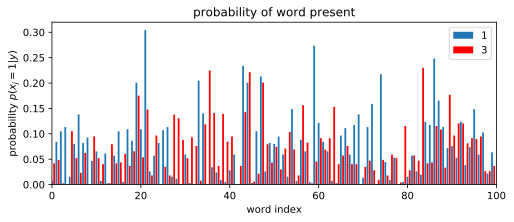

In [24]:
# a function for plotting the word probabilities
def plotWordProb(model):
    xr = arange(0,len(cntvect.vocabulary_))
    plt.figure(figsize=(8,3))
    plt.bar(xr, exp(model.feature_log_prob_[0,:]), width=0.4, label=newsgroups_train.target[0])
    plt.bar(xr+0.5, exp(model.feature_log_prob_[1,:]), width=0.4, color='r', label=newsgroups_train.target[1])
    plt.legend()
    plt.xlabel('word index'); plt.ylabel('probability $p(x_j=1|y)$');
    plt.xlim(min(xr), max(xr)+1)

# make plot
plotWordProb(bmodel)
plt.title('probability of word present');

In [25]:
# prediction
predY = bmodel.predict(testX)
print("predictions: ", predY)
print("actual:      ", newsgroups_test.target)

# calculate accuracy
acc = metrics.accuracy_score(newsgroups_test.target, predY)
print(acc)

predictions:  [1 1 1 ... 1 1 1]
actual:       [2 1 1 ... 3 1 1]


NameError: name 'testY' is not defined

What are the most informative words for each category?  Run the below code.

Note: `model.coef_[i]` will index the scores for the i-th class

In [ ]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.coef_[i][t]))

### 3. Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [ ]:
### INSERT YOUR CODE HERE

What are the most informative features for Multinomial model? Run the below code.

In [ ]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.coef_[i][t]))

How do the most informative words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**

Finally, look at a few of the misclassified documents. 

In [ ]:
### INSERT YOUR CODE HERE ###

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**

### 4. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [ ]:
### INSERT YOUR CODE HERE

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [ ]:
### INSERT YOUR CODE HERE